In [1]:
import functools
import logging
import pprint

import PIL.Image
import graphcat.notebook
import numpy

import imagecat.notebook

logging.basicConfig(level=logging.DEBUG)

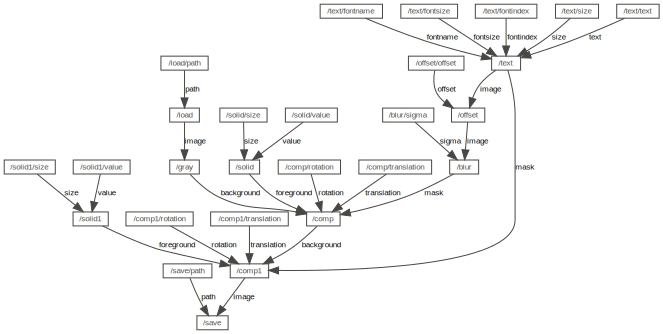

In [2]:
graph = graphcat.Graph()

text = imagecat.add_operation(graph, "/text", imagecat.text, fontname="HelveticaNeue", fontsize=96, fontindex=4, size=(500, 200), text="Imagecat!")
offset = imagecat.add_operation(graph, "/offset", imagecat.offset, offset=(5, 5))
blur = imagecat.add_operation(graph, "/blur", imagecat.gaussian, sigma=5)
graph.add_links(text, (offset, "image"))
graph.add_links(offset, (blur, "image"))

file = imagecat.add_operation(graph, "/load", imagecat.load, path="../artwork/logo.png")
gray = imagecat.add_operation(graph, "/gray", imagecat.rgb2gray)
graph.set_links(file, (gray, "image"))

solid = imagecat.add_operation(graph, "/solid", imagecat.solid, size=(500, 200), value=[0, 0, 0])
comp = imagecat.add_operation(graph, "/comp", imagecat.composite, rotation=30, translation=(-0.25, -0.1))
graph.set_links(solid, (comp, "foreground"))
graph.set_links(gray, (comp, "background"))
graph.set_links(blur, (comp, "mask"))

solid = imagecat.add_operation(graph, "/solid", imagecat.solid, size=(500, 200), value=[1, 0.95, 0.15])
comp2 = imagecat.add_operation(graph, "/comp", imagecat.composite, rotation=30, translation=(-0.25, -0.1))
graph.set_links(solid, (comp2, "foreground"))
graph.set_links(comp, (comp2, "background"))
graph.add_links(text, (comp2, "mask"))

save = imagecat.add_operation(graph, "/save", imagecat.save, path="test.exr")
graph.add_links(comp2, (save, "image"))

graphcat.notebook.display(graph)

INFO:imagecat:Task /solid1 generating solid plane C size (500, 200) value [1.   0.95 0.15]
INFO:imagecat:Task /solid generating solid plane C size (500, 200) value [0 0 0]
INFO:imagecat:Task /load loaded ../artwork/logo.png mode RGBA 2560x1440
INFO:imagecat:Task /gray rgb2gray plane C weights [0.2125 0.7154 0.0721]
INFO:imagecat:Task /text generating text anchor mm fontindex 4 fontname HelveticaNeue fontsize 96 plane A position (250.0, 100.0) size (500, 200)
INFO:imagecat:Task /offset offset [5 5] plane A
INFO:imagecat:Task /blur gaussian blurring plane A sigma 5.0
INFO:imagecat:Task /comp comp foreground C (200, 500, 3) over background C (1440, 2560, 1) with mask A (200, 500, 1)  rotation 30.0 translation (-0.25, -0.1)
INFO:imagecat:Task /comp1 comp foreground C (200, 500, 3) over background C (1440, 2560, 3) with mask A (200, 500, 1)  rotation 30.0 translation (-0.25, -0.1)



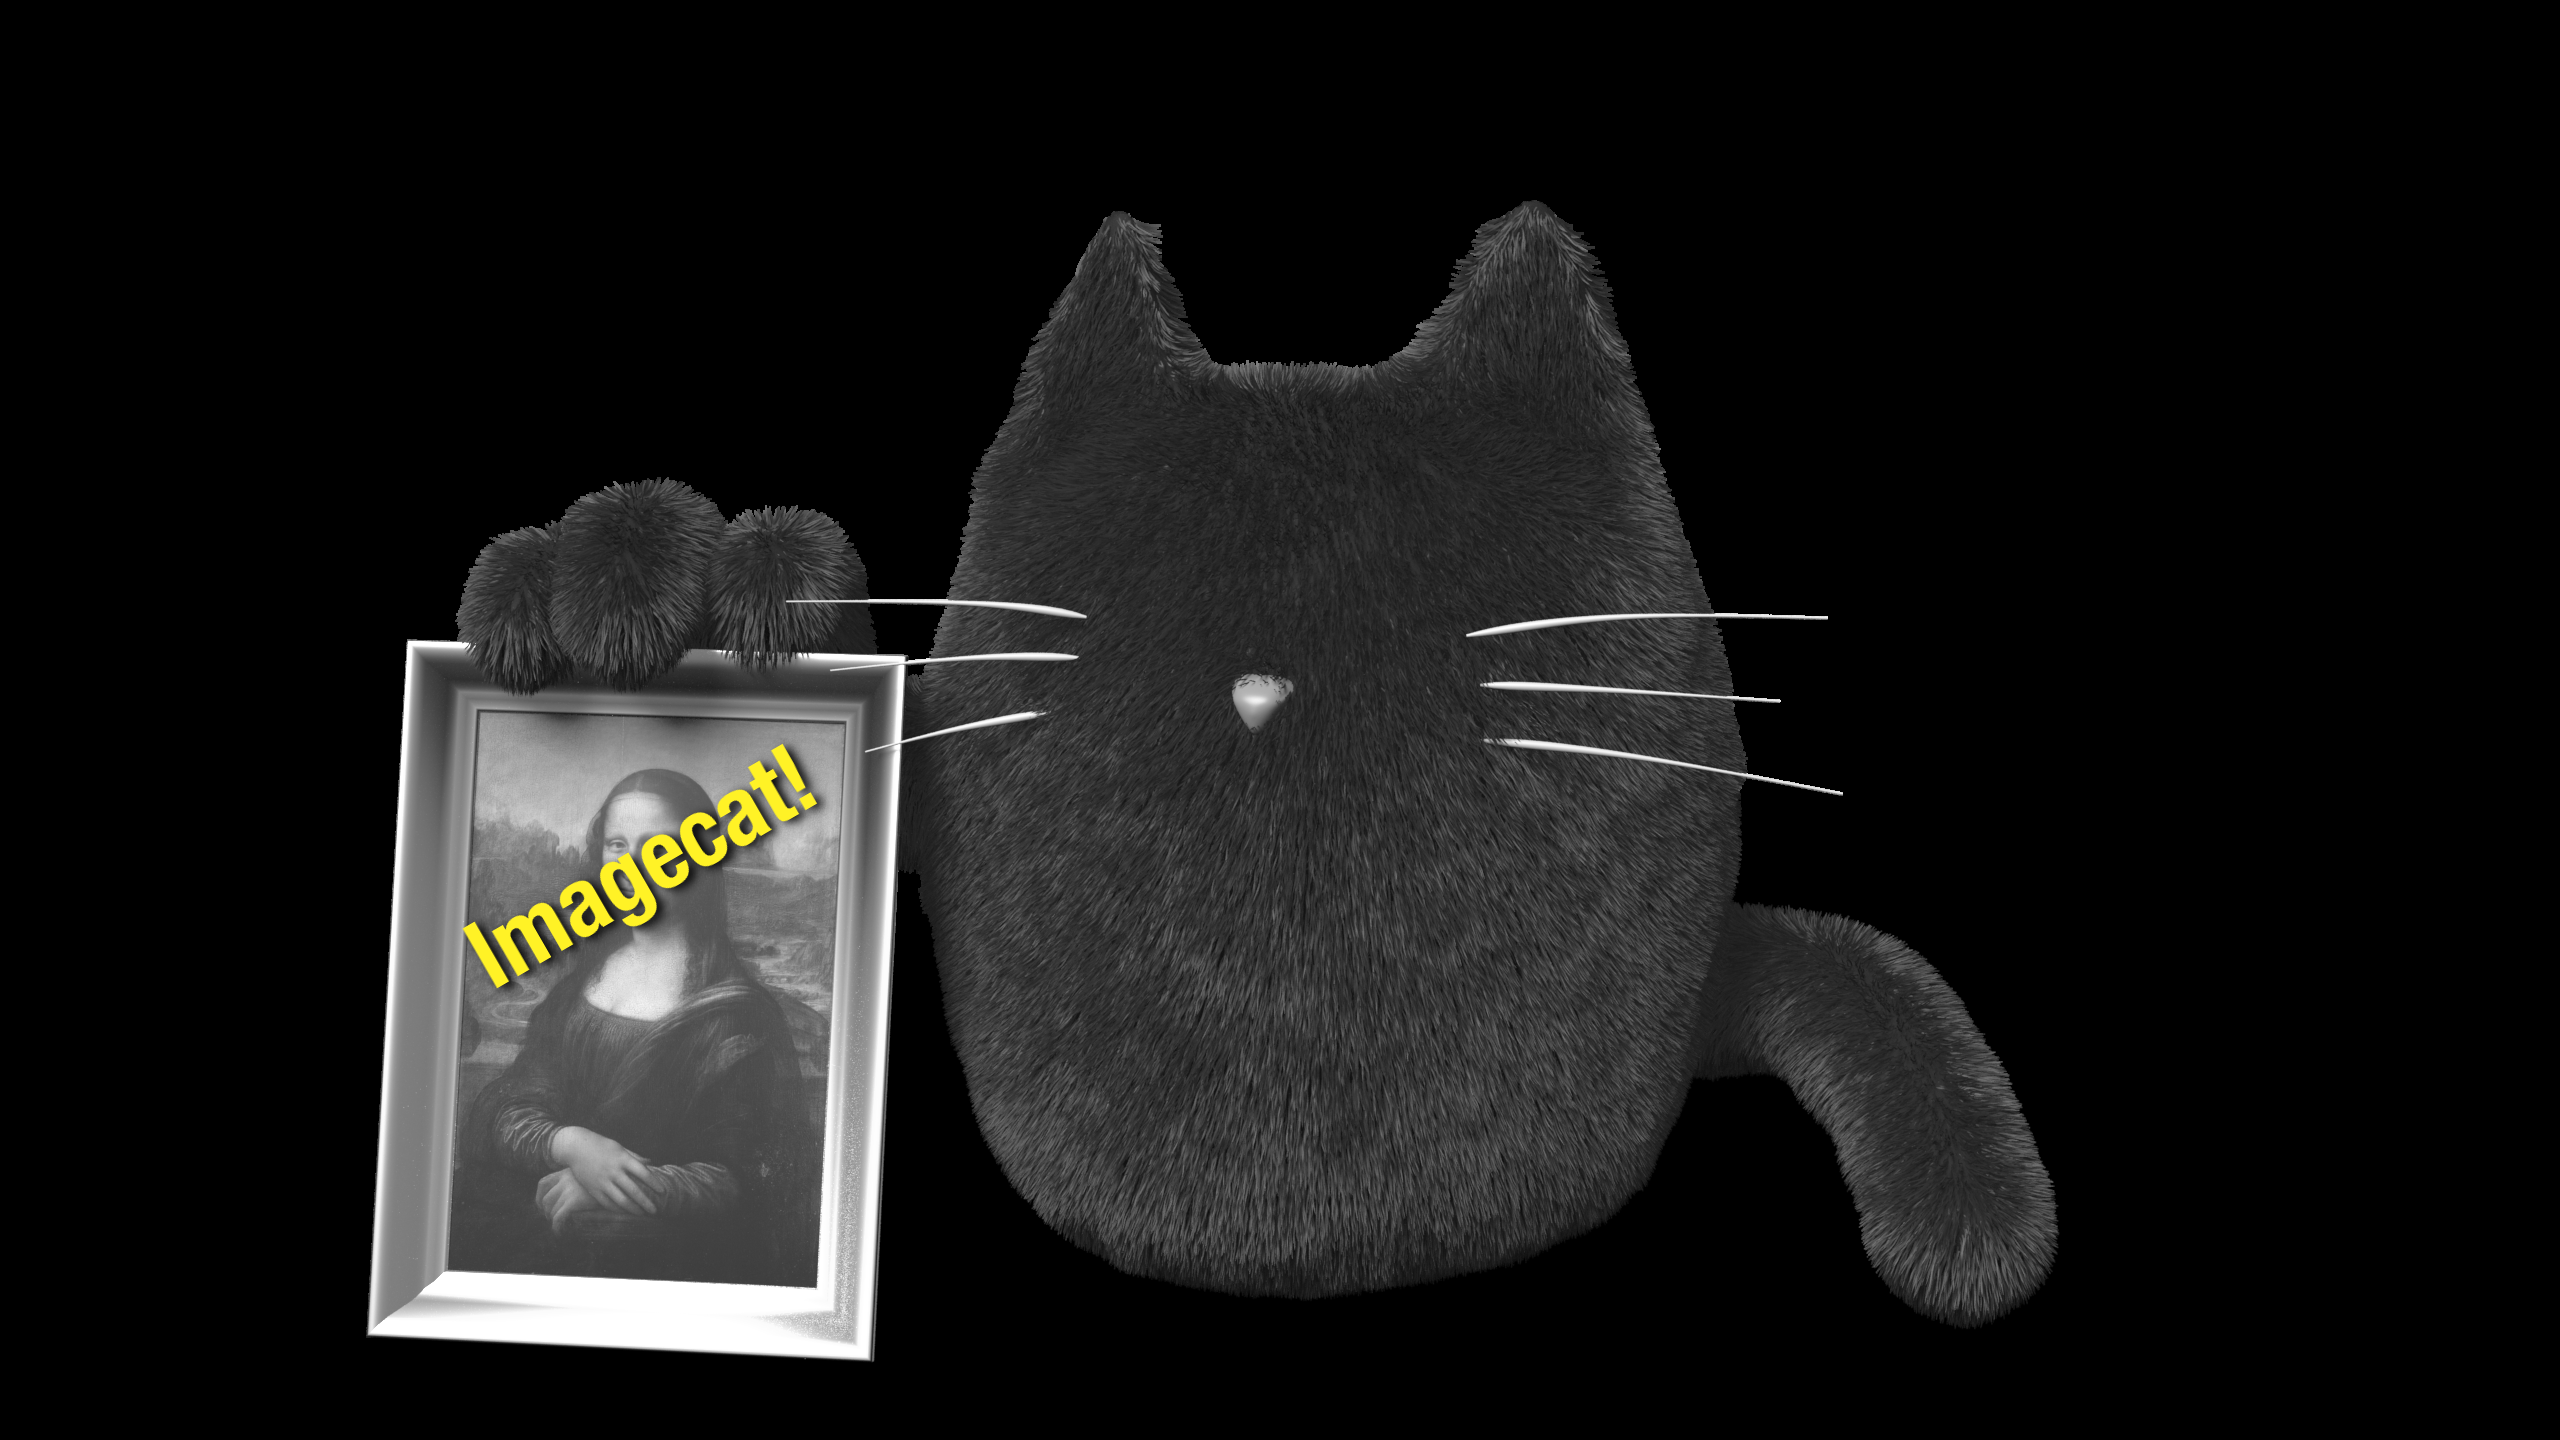

In [3]:
imagecat.notebook.display(graph.output(comp2))

In [4]:
graph.update("/save")

NotImplementedError: 